# Logistic Regression

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Import the dataset

In [2]:
dataset = pd.read_csv("breast_cancer.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into training set and test set

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Logistic Regression model on the training set

In [4]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predict the test set result

In [5]:
y_pred = classifier.predict(X_test)

## Making the confusion matrix

In [6]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(conf_matrix)

[[84  3]
 [ 3 47]]


## Plot confusion matrix

<ipython-input-7-db47a5676929>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-7-db47a5676929>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


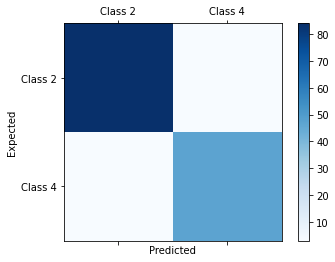

In [7]:
labels = ["Class 2", "Class 4"]

fig = plt.figure()
ax = fig.add_subplot(111)

cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.show()

## Computing the accuracy with k-Fold Cross Validation

In [8]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.70 %
Standard deviation: 1.97 %
